In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.feature_selection import r_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm

In [2]:
data = pd.read_csv('Dopant_Data.csv')
data = data.dropna()
features = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Abs Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
feature_list = features.columns

In [3]:
pearsoncorr = features.corr(method='pearson')
pearsoncorr

,Molecular Weight,Heavy Atom Molecular Weight,Max Abs Partial Charge,Max Partial Charge,Min Abs Partial Charge,Min Partial Charge,Radical Electrons,Valence Electrons,NHOH Count,NO Count,...,Rotatable Bonds,Saturated Carbocycles,Saturated Heterocycles,H Count,C Count,N Count,F Count,Halogen Count,Double Bonds,Triple Bonds
Molecular Weight,1.000000,0.995489,0.169657,0.073052,0.140631,-0.222156,NaN,0.925070,-0.046310,0.296484,...,0.533654,-0.064314,-0.302062,0.267913,0.799254,0.136661,0.342775,0.366653,0.180730,0.076645
Heavy Atom Molecular Weight,0.995489,1.000000,0.151163,0.102596,0.161484,-0.166555,NaN,0.898954,-0.080538,0.302566,...,0.471315,-0.049192,-0.317080,0.175292,0.752915,0.150025,0.391580,0.414727,0.193717,0.127184
Max Abs Partial Charge,0.169657,0.151163,1.000000,0.784421,0.512016,-0.653340,NaN,0.216613,0.289058,-0.172714,...,0.224702,-0.138292,-0.115632,0.225473,0.178691,-0.346185,0.201305,0.218009,-0.103653,-0.319354
Max Partial Charge,0.073052,0.102596,0.784421,1.000000,0.645314,-0.120924,NaN,0.013221,-0.060645,-0.138207,...,-0.139889,-0.062569,-0.100777,-0.283780,-0.123686,-0.292862,0.435762,0.426179,-0.045293,-0.087867
Min Abs Partial Charge,0.140631,0.161484,0.512016,0.645314,1.000000,-0.405633,NaN,0.155609,0.012087,0.263076,...,-0.011677,-0.049782,-0.119658,-0.180506,0.042661,-0.124796,0.207406,0.196007,0.199675,0.070837
Min Partial Charge,-0.222156,-0.166555,-0.653340,-0.120924,-0.405633,1.000000,NaN,-0.379763,-0.506619,-0.083146,...,-0.508840,0.141490,0.094871,-0.613929,-0.450036,0.168413,0.190510,0.159558,-0.021388,0.302366
Radical Electrons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valence Electrons,0.925070,0.898954,0.216613,0.013221,0.155609,-0.379763,NaN,1.000000,0.038959,0.378441,...,0.671729,-0.064088,-0.238403,0.470653,0.922225,0.191433,0.284306,0.282323,0.126355,0.059802
NHOH Count,-0.046310,-0.080538,0.289058,-0.060645,0.012087,-0.506619,NaN,0.038959,1.000000,-0.051266,...,0.337645,-0.071484,0.006328,0.337278,0.054442,-0.108733,-0.118871,-0.119163,-0.221992,-0.195044
NO Count,0.296484,0.302566,-0.172714,-0.138207,0.263076,-0.083146,NaN,0.378441,-0.051266,1.000000,...,0.183699,0.242062,-0.098221,0.004095,0.356762,0.801188,-0.201747,-0.227948,0.201463,0.613117


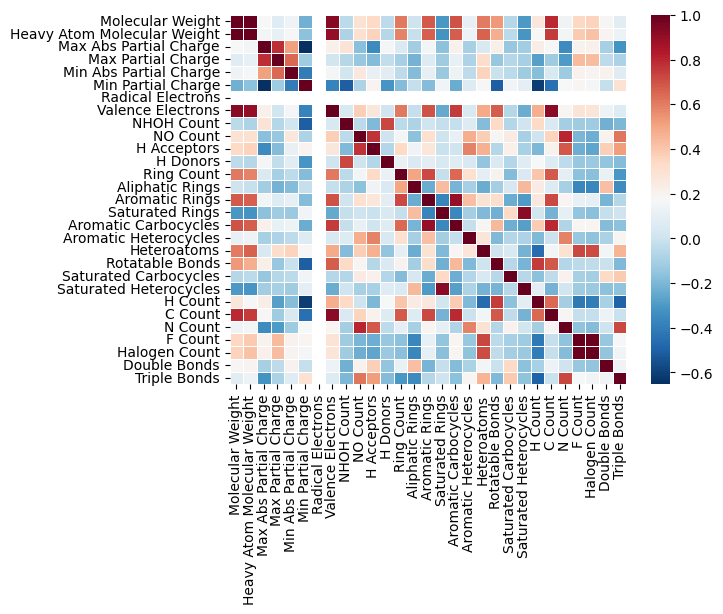

In [4]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

plt.show()

In [5]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

KeyError: "['Max Absolute Partial Charge'] not in index"

In [ ]:

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LUMO   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              12.65
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                    1.36e-05
Time:                        16:33:44   Log-Likelihood:                         -26.759
No. Observations:                  36   AIC:                                      99.52
Df Residuals:                      13   BIC:                                      135.9
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Molecular Weight                0.0767      0.192      0.399      0.696      -0.338       0.492
Heavy Atom Molecular Weight    -0.0695      0.191     -0.364      0.722      -0.482       0.343
Max Absolute Partial Charge    -2.3190      1.870     -1.240      0.237      -6.358       1.720
Max Partial Charge              2.5167      2.196      1.146      0.272      -2.228       7.261
Min Abs Partial Charge          5.4418      4.530      1.201      0.251      -4.345      15.228
Min Partial Charge             -0.6061      1.649     -0.368      0.719      -4.168       2.956
Radical Electrons           -3.424e-15    4.6e-15     -0.745      0.470   -1.34e-14    6.51e-15
Valence Electrons              -0.3546      0.454     -0.781      0.449      -1.335       0.626
NHOH Count                      3.6280      1.478      2.454      0.029       0.434       6.822
NO Count                       -0.2721      0.464     -0.587      0.567      -1.274       0.730
H Acceptors                     1.8637      0.520      3.586      0.003       0.741       2.986
H Donors                       -4.2945      1.901     -2.259      0.042      -8.402      -0.187
Ring Count                     -0.2106      0.641     -0.329      0.748      -1.595       1.174
Aliphatic Rings                 0.3108      0.211      1.470      0.165      -0.146       0.767
Aromatic Rings                 -0.5214      0.612     -0.852      0.409      -1.843       0.800
Saturated Rings                 0.1253      0.462      0.271      0.790      -0.872       1.123
Aromatic Carbocycles            0.4012      0.577      0.695      0.499      -0.846       1.648
Aromatic Heterocycles          -0.9226      0.636     -1.450      0.171      -2.297       0.452
Heteroatoms                    -0.3166      2.899     -0.109      0.915      -6.579       5.946
Rotatable Bonds                 0.2269      0.264      0.858      0.406      -0.344       0.798
Saturated Carbocycles          -0.2082      0.832     -0.250      0.806      -2.005       1.588
Saturated Heterocycles          0.3335      0.484      0.689      0.503      -0.712       1.379
H Count                         0.1451      0.380      0.382      0.709      -0.675       0.966
C Count                         1.4748      1.784      0.827      0.423      -2.379       5.329
N Count                         1.2157      1.099      1.106      0.289      -1.158       3.590
F Count                         1.2327      1.061      1.162      0.266      -1.060       3.525
Halogen Count                   1.1621      1.157      1.005      0.333      -1.337       3.661
Double Bonds                   -0.1625      0.332     -0.489      0.633      -0.880       0.555
Triple B